In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [50]:
df = pd.read_csv("D:/Roadmap/Logistic Regression/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
# Data exploration and visualization
# checking total number of people left and retained
left = df[df.left == 1].shape
retained = df[df.left == 0].shape
print('Left: ',len(df[df.left ==1]),' Retained: ' ,len(df[df.left ==0]))

Left:  3571  Retained:  11428


In [62]:
#checking average value of variables for those who left and retained
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [64]:
df.groupby('left').median()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.0,198.0,3.0,0.0,0.0
1,0.41,0.79,4.0,224.0,4.0,0.0,0.0


In [65]:
# satisfaction level, avg monthly hours, promotion last year - considered numerical variables
## work_accident(both are close to 0) , last_evaluation and no project (both same) - not considered numerical variables
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [68]:
#categorical variable, text
df.groupby('left').count().index

Int64Index([0, 1], dtype='int64', name='left')

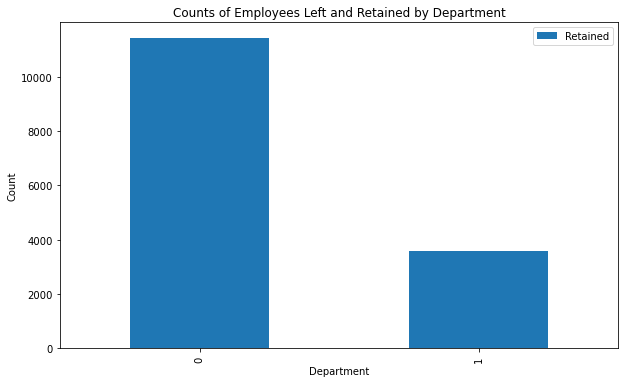

In [73]:
left_department_counts = df.groupby(['left']).size()

# Plot the bar graph
left_department_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Counts of Employees Left and Retained by Department')
plt.legend(['Retained', 'Left'])
plt.show()

In [111]:
test = df.groupby(['salary','left']).size().unstack()


Text(0.5, 1.0, 'Multi-Column Bar Graph')

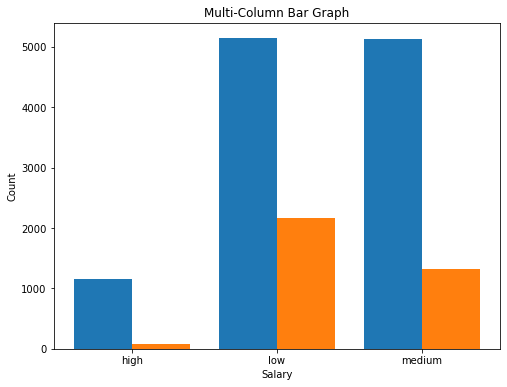

In [118]:
# Create the multi-column bar graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(positions, test[0], width=width, label='Left 0')
ax.bar([pos + width for pos in positions], test[1], width=width, label='Left 1')

# Set the labels and title
ax.set_xticks([pos + width / 2 for pos in positions])
ax.set_xticklabels(test.index)
ax.set_xlabel('Salary')
ax.set_ylabel('Count')
ax.set_title('Multi-Column Bar Graph')
#employee with high salary is not likely to leave company
# test.plot(kind='bar')

<AxesSubplot:xlabel='Department'>

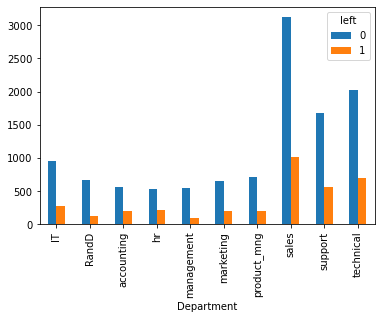

In [121]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
#not 

In [124]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [ ]:
# From the data analysis so far we can conclude that we will use following variables as independant variables in our model
# **Satisfaction Level**
# **Average Monthly Hours**
# **Promotion Last 5 Years**
# **Salary**

In [155]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [156]:
#tackling salary using dummy variable
subdf = pd.concat([subdf.drop('salary',axis=1), pd.get_dummies(subdf.salary, prefix = 'salary', drop_first = True)],axis=1)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(subdf.drop('left', axis=1), subdf.left, test_size=0.7)

In [158]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [159]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
#accuracy of the model
model.score(X_test,y_test)

0.7739047619047619